<a href="https://colab.research.google.com/github/sergior2/CSCI544-Final-Report/blob/main/Evaluation/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
data = pd.read_csv("gdrive/MyDrive/Colab Notebooks/haikus.csv")

In [6]:
data.shape

(143137, 7)

In [7]:
data.head()

,0,1,2,source,0_syllables,1_syllables,2_syllables
0,Memorial Day --,a shadow for each,white cross,tempslibres,5,5,2
1,spring rain -,as the doctor speaks,i think of lilacs,tempslibres,"2,3",5,5
2,spring moonset --,a rice ball for,breakfast,tempslibres,"3,4",4,2
3,sunny afternoon,an old man lingers,near the mailbox,tempslibres,5,5,4
4,cinco de mayo,horses roll,in the shallows,tempslibres,5,3,4


In [8]:
data_575 = data[(data["0_syllables"] == "5") & (data["1_syllables"] == "7")  & (data["2_syllables"] == "5")]

In [9]:
data_575.shape

(93390, 7)

In [10]:
data_575.head()
data_575.reset_index(inplace=True, drop=True)

In [11]:
data_575.head()

,0,1,2,source,0_syllables,1_syllables,2_syllables
0,last red in the sky,a small girl's moon face rises,over the counter,tempslibres,5,7,5
1,christmas services,a cellular phone rings out,handel's messiah,tempslibres,5,7,5
2,Passover darkness -,before the buds burst open;,a child's eyes in death.,tempslibres,5,7,5
3,Last night of Summer,the bright full moon of last night,hidden by a cloud,tempslibres,5,7,5
4,Midnight and full moon,my neighbour asks to borrow,the vacum cleaner,tempslibres,5,7,5


In [12]:
data_575 = data_575.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
data_575.head()

,0,1,2,source,0_syllables,1_syllables,2_syllables
0,You don't give people,the reaction they want watch,that shit eat em up,twaiku,5,7,5
1,Still waiting for the,day I get taken on a,date to Barnes Noble,twaiku,5,7,5
2,Thankful I know what's,best for me and that I know,when to walk away,twaiku,5,7,5
3,I'm so tired it's,so late I cried tonight and,now it's time for sLEEP,twaiku,5,7,5
4,hating is a full,time job rather get under,your skin with a smile,twaiku,5,7,5


In [14]:
data_575["0"] = data_575["0"].apply(lambda x: x.lower())
data_575["1"] = data_575["1"].apply(lambda x: x.lower())
data_575["2"] = data_575["2"].apply(lambda x: x.lower())

In [15]:
texts_575 = data_575.apply(lambda x: "/n".join([x[0], x[1], x[2]]).lower(), axis=1)

In [16]:
words = data_575.apply(lambda x: x["0"].split() + x["1"].split() + x["2"].split(), axis=1)
vocab = []
for w in words:
  vocab += w

words, counts = np.unique(vocab, return_counts=True)

In [17]:
from tqdm import tqdm

In [18]:
data_575_sample = data_575.loc[:5999]

In [19]:
data_575_sample.shape

(6000, 7)

In [20]:
splits = np.split(data_575_sample, 2)

In [21]:
noise_0 = splits[0]
noise_30 = splits[1]

In [22]:
noise_30.head()

,0,1,2,source,0_syllables,1_syllables,2_syllables
3000,we're going to look,at a venue tomorrow,and i'm so happy,twaiku,5,7,5
3001,the apartments in,baltimore city make me,wanna move out there,twaiku,5,7,5
3002,loyalty over,love any day everything,else will fall in place,twaiku,5,7,5
3003,if someone you hate,for no reason that means you,had feelings for them,twaiku,5,7,5
3004,good morning well i,guess it's afternoon now what,should i get for lunch,twaiku,5,7,5


In [23]:
def replace(data, share, vocab):
  texts = data.apply(lambda x: x["0"].split() + x["1"].split() + x["2"].split(), axis=1).values
  sizes = [len(t) for t in texts]
  line_sizes = data.apply(lambda x: [len(x["0"].split()), len(x["1"].split()), len(x["2"].split())], axis=1).values
  indices = [np.random.choice(np.arange(s), size=int(np.floor(share * s)), replace=False) for s in sizes]
  first = []
  second = []
  third = []
  for i in tqdm(range(len(indices))):
    for j in indices[i]:
      texts[i][j] = np.random.choice(vocab)
      # a = 1
    first.append(" ".join(texts[i][:line_sizes[i][0]]))
    second.append(" ".join(texts[i][line_sizes[i][0]:line_sizes[i][0]+line_sizes[i][1]]))
    third.append(" ".join(texts[i][line_sizes[i][0] + line_sizes[i][1]:]))

  data["0"] = first
  data["1"] = second
  data["2"] = third

  return data


In [24]:
noise_30 = replace(noise_30, 0.3, vocab)

100%|██████████| 3000/3000 [36:30<00:00,  1.37it/s]


In [25]:
noise_0.to_csv("gdrive/MyDrive/Colab Notebooks/zero_noise_bin.csv", index=False)
noise_30.to_csv("gdrive/MyDrive/Colab Notebooks/30_noise_bin.csv", index=False)

In [130]:
noise_0.to_csv("zero_noise.csv", index=False)
noise_30.to_csv("30_noise.csv", index=False)
noise_60.to_csv("60_noise.csv", index=False)

In [27]:
noise_30.head()

,0,1,2,source,0_syllables,1_syllables,2_syllables
3000,we're some to look,already a venue tomorrow,and but so happy,twaiku,5,7,5
3001,the apartments in,poor city make me,wanna yet out over,twaiku,5,7,5
3002,loyalty that,love things day everything,people will fall in place,twaiku,5,7,5
3003,nine someone so hate,for no reason interrupt means you,had working for them,twaiku,5,7,5
3004,friends morning well i,guess it's afternoon now what,over his get man lunch,twaiku,5,7,5


_______________________________________________________

### Classification

In [39]:
import numpy as np
import pandas as pd

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
noise_0_bin = pd.read_csv("gdrive/MyDrive/Colab Notebooks/zero_noise_bin.csv")
noise_30_bin = pd.read_csv("gdrive/MyDrive/Colab Notebooks/30_noise_bin.csv")

noise_0_bin["label"] = 0
noise_30_bin["label"] = 1

data_bin = pd.concat([noise_0_bin, noise_30_bin], axis=0)

data_bin["text"] = data_bin.apply(lambda x: "\n".join([x["0"], x["1"], x["2"]]), axis=1)

data_bin.head()

,0,1,2,source,0_syllables,1_syllables,2_syllables,label,text
0,you don't give people,the reaction they want watch,that shit eat em up,twaiku,5,7,5,0,you don't give people\n the reaction they want...
1,still waiting for the,day i get taken on a,date to barnes noble,twaiku,5,7,5,0,still waiting for the\n day i get taken on a\n...
2,thankful i know what's,best for me and that i know,when to walk away,twaiku,5,7,5,0,thankful i know what's\n best for me and that ...
3,i'm so tired it's,so late i cried tonight and,now it's time for sleep,twaiku,5,7,5,0,i'm so tired it's\n so late i cried tonight an...
4,hating is a full,time job rather get under,your skin with a smile,twaiku,5,7,5,0,hating is a full\n time job rather get under\n...


**Train Classificator**

If you're opening this Notebook on colab, you will probably need to install 🤗 Transformers and 🤗 Datasets. Uncomment the following cell and run it.

In [40]:
! pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

from tabulate import tabulate
from tqdm import trange
import random

In [ ]:
text = data_bin.text.values
labels = data_bin.label.values

In [42]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case = True,
    # sep_token = "\n"
    )

In [7]:
def print_rand_sentence():
  '''Displays the tokens and respective IDs of a random text sample'''
  index = random.randint(0, len(text)-1)
  table = np.array([tokenizer.tokenize(text[index]), 
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text[index]))]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence()

╒══════════╤═════════════╕
│ Tokens   │   Token IDs │
╞══════════╪═════════════╡
│ goodness │       15003 │
├──────────┼─────────────┤
│ those    │        2216 │
├──────────┼─────────────┤
│ chi      │        9610 │
├──────────┼─────────────┤
│ ##a      │        2050 │
├──────────┼─────────────┤
│ seeds    │        8079 │
├──────────┼─────────────┤
│ have     │        2031 │
├──────────┼─────────────┤
│ really   │        2428 │
├──────────┼─────────────┤
│ filled   │        3561 │
├──────────┼─────────────┤
│ me       │        2033 │
├──────────┼─────────────┤
│ up       │        2039 │
├──────────┼─────────────┤
│ said     │        2056 │
├──────────┼─────────────┤
│ no       │        2053 │
├──────────┼─────────────┤
│ one      │        2028 │
├──────────┼─────────────┤
│ ever     │        2412 │
╘══════════╧═════════════╛


In [43]:
token_id = []
attention_masks = []

def preprocessing(input_text, tokenizer):
  '''
  Returns <class transformers.tokenization_utils_base.BatchEncoding> with the following fields:
    - input_ids: list of token ids
    - token_type_ids: list of token type ids
    - attention_mask: list of indices (0,1) specifying which tokens should considered by the model (return_attention_mask = True).
  '''
  return tokenizer.encode_plus(
                        input_text,
                        add_special_tokens = True,
                        max_length = 32,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )


for sample in text:
  encoding_dict = preprocessing(sample, tokenizer)
  token_id.append(encoding_dict['input_ids']) 
  attention_masks.append(encoding_dict['attention_mask'])


token_id = torch.cat(token_id, dim = 0)
attention_masks = torch.cat(attention_masks, dim = 0)
labels = torch.tensor(labels)

In [9]:
token_id[6]

tensor([  101,  2619,  2175,  2000, 20877,  2007,  2033,  2061,  2026,  2905,
         2097,  3844,  2039,  2055,  2009,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [10]:

def print_rand_sentence_encoding():
  '''Displays tokens, token IDs and attention mask of a random text sample'''
  index = random.randint(0, len(text) - 1)
  tokens = tokenizer.tokenize(tokenizer.decode(token_id[index]))
  token_ids = [i.numpy() for i in token_id[index]]
  attention = [i.numpy() for i in attention_masks[index]]

  table = np.array([tokens, token_ids, attention]).T
  print(tabulate(table, 
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence_encoding()

╒══════════╤═════════════╤══════════════════╕
│ Tokens   │   Token IDs │   Attention Mask │
╞══════════╪═════════════╪══════════════════╡
│ [CLS]    │         101 │                1 │
├──────────┼─────────────┼──────────────────┤
│ i        │        1045 │                1 │
├──────────┼─────────────┼──────────────────┤
│ was      │        2001 │                1 │
├──────────┼─────────────┼──────────────────┤
│ going    │        2183 │                1 │
├──────────┼─────────────┼──────────────────┤
│ to       │        2000 │                1 │
├──────────┼─────────────┼──────────────────┤
│ tell     │        2425 │                1 │
├──────────┼─────────────┼──────────────────┤
│ you      │        2017 │                1 │
├──────────┼─────────────┼──────────────────┤
│ about    │        2055 │                1 │
├──────────┼─────────────┼──────────────────┤
│ my       │        2026 │                1 │
├──────────┼─────────────┼──────────────────┤
│ hai      │       15030 │        

In [11]:
val_ratio = 0.2
# Recommended batch size: 16, 32. See: https://arxiv.org/pdf/1810.04805.pdf
batch_size = 16

# Indices of the train and validation splits stratified by labels
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size = val_ratio,
    shuffle = True,
    stratify = labels)

# Train and validation sets
train_set = TensorDataset(token_id[train_idx], 
                          attention_masks[train_idx], 
                          labels[train_idx])

val_set = TensorDataset(token_id[val_idx], 
                        attention_masks[val_idx], 
                        labels[val_idx])

# Prepare DataLoader
train_dataloader = DataLoader(
            train_set,
            sampler = RandomSampler(train_set),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_set,
            sampler = SequentialSampler(val_set),
            batch_size = batch_size
        )

In [12]:
def b_tp(preds, labels):
  '''Returns True Positives (TP): count of correct predictions of actual class 1'''
  return sum([preds == labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_fp(preds, labels):
  '''Returns False Positives (FP): count of wrong predictions of actual class 1'''
  return sum([preds != labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_tn(preds, labels):
  '''Returns True Negatives (TN): count of correct predictions of actual class 0'''
  return sum([preds == labels and preds > 0 for preds, labels in zip(preds, labels)])

def b_fn(preds, labels):
  '''Returns False Negatives (FN): count of wrong predictions of actual class 0'''
  return sum([preds != labels and preds > 0 for preds, labels in zip(preds, labels)])

def b_metrics(preds, labels):
  '''
  Returns the following metrics:
    - accuracy    = (TP + TN) / N
    - precision   = TP / (TP + FP)
    - recall      = TP / (TP + FN)
    - specificity = TN / (TN + FP)
  '''
  preds = np.argmax(preds, axis = 1).flatten()
  labels = labels.flatten()
  tp = b_tp(preds, labels)
  tn = b_tn(preds, labels)
  fp = b_fp(preds, labels)
  fn = b_fn(preds, labels)
  b_accuracy = (tp + tn) / len(labels)
  b_precision = tp / (tp + fp) if (tp + fp) > 0 else 'nan'
  b_recall = tp / (tp + fn) if (tp + fn) > 0 else 'nan'
  b_specificity = tn / (tn + fp) if (tn + fp) > 0 else 'nan'
  return b_accuracy, b_precision, b_recall, b_specificity

In [13]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

# Recommended learning rates (Adam): 5e-5, 3e-5, 2e-5. See: https://arxiv.org/pdf/1810.04805.pdf
optimizer = torch.optim.AdamW(model.parameters(), 
                              lr = 5e-5,
                              eps = 1e-08
                              )

# Run on GPU
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Recommended number of epochs: 2, 3, 4. See: https://arxiv.org/pdf/1810.04805.pdf
epochs = 2

for _ in trange(epochs, desc = 'Epoch'):
    
    # ========== Training ==========
    
    # Set model to training mode
    model.train()
    
    # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        optimizer.zero_grad()
        # Forward pass
        train_output = model(b_input_ids, 
                             token_type_ids = None, 
                             attention_mask = b_input_mask, 
                             labels = b_labels)
        # Backward pass
        train_output.loss.backward()
        optimizer.step()
        # Update tracking variables
        tr_loss += train_output.loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    # ========== Validation ==========

    # Set model to evaluation mode
    model.eval()

    # Tracking variables 
    val_accuracy = []
    val_precision = []
    val_recall = []
    val_specificity = []

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
          # Forward pass
          eval_output = model(b_input_ids, 
                              token_type_ids = None, 
                              attention_mask = b_input_mask)
        logits = eval_output.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # Calculate validation metrics
        b_accuracy, b_precision, b_recall, b_specificity = b_metrics(logits, label_ids)
        val_accuracy.append(b_accuracy)
        # Update precision only when (tp + fp) !=0; ignore nan
        if b_precision != 'nan': val_precision.append(b_precision)
        # Update recall only when (tp + fn) !=0; ignore nan
        if b_recall != 'nan': val_recall.append(b_recall)
        # Update specificity only when (tn + fp) !=0; ignore nan
        if b_specificity != 'nan': val_specificity.append(b_specificity)

    print('\n\t - Train loss: {:.4f}'.format(tr_loss / nb_tr_steps))
    print('\t - Validation Accuracy: {:.4f}'.format(sum(val_accuracy)/len(val_accuracy)))
    print('\t - Validation Precision: {:.4f}'.format(sum(val_precision)/len(val_precision)) if len(val_precision)>0 else '\t - Validation Precision: NaN')
    print('\t - Validation Recall: {:.4f}'.format(sum(val_recall)/len(val_recall)) if len(val_recall)>0 else '\t - Validation Recall: NaN')
    print('\t - Validation Specificity: {:.4f}\n'.format(sum(val_specificity)/len(val_specificity)) if len(val_specificity)>0 else '\t - Validation Specificity: NaN')

Epoch:  50%|█████     | 1/2 [00:38<00:38, 38.66s/it]


	 - Train loss: 0.2535
	 - Validation Accuracy: 0.9167
	 - Validation Precision: 0.9037
	 - Validation Recall: 0.9330
	 - Validation Specificity: 0.8981



Epoch: 100%|██████████| 2/2 [01:17<00:00, 38.50s/it]


	 - Train loss: 0.0666
	 - Validation Accuracy: 0.9033
	 - Validation Precision: 0.8797
	 - Validation Recall: 0.9276
	 - Validation Specificity: 0.8758



In [15]:
haiku = 'apples of paradise\nviolently shake in the storm\njust like my heartstrings'

# We need Token IDs and Attention Mask for inference on the new sentence
test_ids = []
test_attention_mask = []

# Apply the tokenizer
encoding = preprocessing(haiku, tokenizer)

# Extract IDs and Attention Mask
test_ids.append(encoding['input_ids'])
test_attention_mask.append(encoding['attention_mask'])
test_ids = torch.cat(test_ids, dim = 0)
test_attention_mask = torch.cat(test_attention_mask, dim = 0)

# Forward pass, calculate logit predictions
with torch.no_grad():
  output = model(test_ids.to(device), token_type_ids = None, attention_mask = test_attention_mask.to(device))

prediction = 'Good' if np.argmax(output.logits.cpu().numpy()).flatten().item() == 0 else 'Bad'

print('Input Haiku: ', haiku)
print('Predicted Class: ', prediction)

Input Haiku:  apples of paradise
violently shake in the storm
just like my heartstrings
Predicted Class:  Good


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [18]:
noise_0 = pd.read_csv("gdrive/MyDrive/Colab Notebooks/zero_noise.csv")
noise_30 = pd.read_csv("gdrive/MyDrive/Colab Notebooks/30_noise.csv")
noise_60 = pd.read_csv("gdrive/MyDrive/Colab Notebooks/60_noise.csv")

noise_0["label"] = 0
noise_30["label"] = 1
noise_60["label"] = 2

test_data = pd.concat([noise_0, noise_30], axis=0)
test_data["text"] = test_data.apply(lambda x: "\n".join([x["0"], x["1"], x["2"]]), axis=1)
# data = pd.concat([noise_0, noise_30, noise_60], axis=0)

In [19]:
test_text = test_data.text
test_label = test_data.label

In [21]:
from tqdm import tqdm

predictions = []
# We need Token IDs and Attention Mask for inference on the new sentence
for sample in tqdm(test_text):
  test_ids = []
  test_attention_mask = []

  # Apply the tokenizer
  encoding = preprocessing(sample, tokenizer)

  # Extract IDs and Attention Mask
  test_ids.append(encoding['input_ids'])
  test_attention_mask.append(encoding['attention_mask'])
  test_ids = torch.cat(test_ids, dim = 0)
  test_attention_mask = torch.cat(test_attention_mask, dim = 0)

  # Forward pass, calculate logit predictions
  with torch.no_grad():
    output = model(test_ids.to(device), token_type_ids = None, attention_mask = test_attention_mask.to(device))

  predictions.append(np.argmax(output.logits.cpu().numpy()).flatten().item())

  0%|          | 0/4000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 4000/4000 [00:47<00:00, 83.86it/s]


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
print("accuracy:", accuracy_score(np.array(predictions), test_label.values))
print("precision:", precision_score(np.array(predictions), test_label.values))
print("recall:", recall_score(np.array(predictions), test_label.values))
print("F1:", f1_score(np.array(predictions), test_label.values))

accuracy: 0.928
precision: 0.8715
recall: 0.9825253664036077
F1: 0.9236883942766296


In [24]:
torch.save(model, "gdrive/MyDrive/Colab Notebooks/bert_classifier.pickle")

In [26]:
with open("gdrive/MyDrive/Colab Notebooks/output.txt") as f:
  m1_haiku = f.readlines()

m1_prompts = [t.split()[0] for t in m1_haiku]
m1_haiku = [m1_haiku[i].replace("/n", "\n") for i in range(len(m1_haiku))]

with open("gdrive/MyDrive/Colab Notebooks/output2.txt") as f:
  m2_haiku = f.readlines()

m2_haiku = [m2_haiku[i].replace("/n", "\n") for i in range(len(m2_haiku))]

with open("gdrive/MyDrive/Colab Notebooks/output3.txt") as f:
  m3_haiku = f.readlines()

m3_haiku = [m3_haiku[i].replace(" /n ", "\n") for i in range(len(m3_haiku))]

with open("gdrive/MyDrive/Colab Notebooks/output4.txt") as f:
  m4_haiku = f.readlines()

m4_haiku = [m4_haiku[i].replace(" /n ", "\n") for i in range(len(m4_haiku))]

with open("gdrive/MyDrive/Colab Notebooks/loweredcase.txt") as f:
  human_haiku = f.readlines()

human_haiku = [haiku[8:].strip().replace(" / ", "\n") for haiku in human_haiku]

In [27]:
m1_haiku[:5]

['anger drives passion\nhatred drives passion walk love\nlove life joy and joy\n',
 'anger is power\nis power i love it\nlove it this is joy\n',
 'anger is power\nis joy and pleasant\nlife is joy and joy\n',
 "anger is the answer\ni'll always be there for\nyou no excuse me\n",
 'anger drives louder\nthan anything and\nenergy goes to\n']

In [28]:
m2_haiku[:5]

["anger on the face\nis the enemy of the\nblack people's death\n",
 'anger is always\na distraction and not\na reason to smile\n',
 "anger doesn't know\nwhat it is not expect to\ndo for the party\n",
 'anger is not so\nstupid it is very\nfunny to have her\n',
 "anger is real but\ni'm not an idiot but\nno one will fuck me\n"]

In [29]:
m3_haiku[:5]

['anger is not an\nentitlement for a long\nterm of being raped\n',
 'anger is like you\ncould be but i will never\nbe in that mood now\n',
 "anger is the right\nwhen i'm doing this for\nthe rest of the world\n",
 'anger is not in\nmy mind but no matter what\nwe will be doing\n',
 "anger is a face\nof being alive is now\nit's just that time\n"]

In [30]:
m4_haiku[:5]

["anger in my head\nat work today and this bitch\nwon't be able to\n",
 'anger is like the\nonly way to figure out how\nto survive the rest\n',
 'anger is the best\nfor me and i hope everyone\nin the valley gets blessed\n',
 'anger is that which\nmeans you can seek for something\nand be happy\n',
 'anger takes from your\nheart but you only need your\npain from killing it\n']

In [31]:
human_haiku[:5]

['i saw that finger!\nyes you in the intrepid -\nwe shall meet again',
 'cut into his arm\na line for each day between\nchristmas and new year',
 'scattered in the ditch\nlike tiny scraps of blue sky\nbits of plastic bag',
 "to find the beauty\neven if it's dark and grey\nthat lightens my day",
 'like a summer breeze\nblue sky landing in my heart\na cloud with feathers']

In [48]:
def classify_haiku(haiku):
  predictions = []
  # We need Token IDs and Attention Mask for inference on the new sentence
  for sample in tqdm(haiku):
    test_ids = []
    test_attention_mask = []

    # Apply the tokenizer
    encoding = preprocessing(sample, tokenizer)

    # Extract IDs and Attention Mask
    test_ids.append(encoding['input_ids'])
    test_attention_mask.append(encoding['attention_mask'])
    test_ids = torch.cat(test_ids, dim = 0)
    test_attention_mask = torch.cat(test_attention_mask, dim = 0)

    # Forward pass, calculate logit predictions
    with torch.no_grad():
      output = model(test_ids.to(device), token_type_ids = None, attention_mask = test_attention_mask.to(device))

    predictions.append(np.argmax(output.logits.cpu().numpy()).flatten().item())

  return predictions

In [35]:
print("Model 1 Poems:", len(m1_haiku))
print("Model 1 Percent of Good Poems:", 1 - np.sum(classify_haiku(m1_haiku)) / len(m1_haiku))

Model 1 Poems: 1000


100%|██████████| 1000/1000 [00:11<00:00, 88.75it/s]

Model 1 Percent of Good Poems: 0.956


In [38]:
print("Model 2 Poems:", len(m2_haiku))
print("Model 2 Percent of Good Poems:", 1 - np.sum(classify_haiku(m2_haiku)) / len(m2_haiku))

Model 2 Poems: 1000


100%|██████████| 1000/1000 [00:21<00:00, 45.46it/s]

Model 2 Percent of Good Poems: 0.979


In [39]:
print("Model 3 Poems:", len(m3_haiku))
print("Model 3 Percent of Good Poems:", 1 - np.sum(classify_haiku(m3_haiku)) / len(m3_haiku))

Model 3 Poems: 1000


100%|██████████| 1000/1000 [00:21<00:00, 45.60it/s]

Model 3 Percent of Good Poems: 0.965


In [40]:
print("Model 4 Poems:", len(m4_haiku))
print("Model 4 Percent of Good Poems:", 1 - np.sum(classify_haiku(m4_haiku)) / len(m4_haiku))

Model 4 Poems: 1000


100%|██████████| 1000/1000 [00:18<00:00, 53.13it/s]

Model 4 Percent of Good Poems: 0.972


In [41]:
print("Human Poems:", len(human_haiku))
print("Human Percent of Good Poems:", 1 - np.sum(classify_haiku(human_haiku)) / len(human_haiku))

Human Poems: 92110


  0%|          | 0/92110 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 92110/92110 [17:23<00:00, 88.28it/s]

Human Percent of Good Poems: 0.9494191727282597


In [30]:
with open("gdrive/MyDrive/Colab Notebooks/output_baseline_cnt.txt") as f:
  baseline_haiku = f.readlines()

baseline_haiku = [haiku[8:].strip().replace(" /n ", "\n") for haiku in baseline_haiku]

In [51]:
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Baseline Poems:", len(baseline_haiku))
print("Baseline Percent of Good Poems:", 1 - np.sum(classify_haiku(baseline_haiku)) / len(baseline_haiku))

Baseline Poems: 992


100%|██████████| 992/992 [02:56<00:00,  5.63it/s]

Baseline Percent of Good Poems: 0.9808467741935484


In [46]:
model = torch.load("gdrive/MyDrive/Colab Notebooks/bert_classifier.pickle", map_location=torch.device('cpu'))

In [31]:
baseline_haiku[0]

"anger is an\nawful person but it's all good\nand i wanna do"

In [29]:
baseline_haiku[0]

"4,8,5 | anger is an /n awful person but it's all good /n and i wanna do \n"

### Structure Evaluation

In [2]:
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [22]:
with open("gdrive/MyDrive/Colab Notebooks/output_baseline_cnt.txt") as f:
  output0_cnt = f.readlines()

with open("gdrive/MyDrive/Colab Notebooks/output_cnt.txt") as f:
  output1_cnt = f.readlines()

with open("gdrive/MyDrive/Colab Notebooks/output2_cnt.txt") as f:
  output2_cnt = f.readlines()

with open("gdrive/MyDrive/Colab Notebooks/output3_cnt.txt") as f:
  output3_cnt = f.readlines()

with open("gdrive/MyDrive/Colab Notebooks/output4_cnt.txt") as f:
  output4_cnt = f.readlines()

with open("gdrive/MyDrive/Colab Notebooks/output_human_cnt.txt") as f:
  output_human_cnt = f.readlines()

In [23]:
def score(count):
  score = 0 
  if count[0] == 5:
    score += 2
  if count[1] == 7:
    score += 2
  if count[2] == 5:
    score += 2
  return score

def get_score(counts):
  counts = [cnt[:5].split(",") for cnt in counts]
  bad_counts = [count for count in counts if "" in count]
  n_bad = len(bad_counts)
  good_counts = counts
  # good_counts = [count for count in counts if count not in bad_counts]
  good_counts = [[int(c) if c.isnumeric() else 0 for c in count] for count in good_counts]
  scores = list(map(score, good_counts))

  return n_bad, np.mean(scores)

In [25]:
n_bad0, score0 = get_score(output0_cnt)
n_bad1, score1 = get_score(output1_cnt)
n_bad2, score2 = get_score(output2_cnt)
n_bad3, score3 = get_score(output3_cnt)
n_bad4, score4 = get_score(output4_cnt)
n_bad_human, score_human = get_score(output_human_cnt)

In [27]:
score0, score1, score2, score3, score4, score_human

(2.6875,
 2.6264308012486994,
 3.468937875751503,
 3.4170854271356785,
 2.768920282542886,
 3.093236347844968)

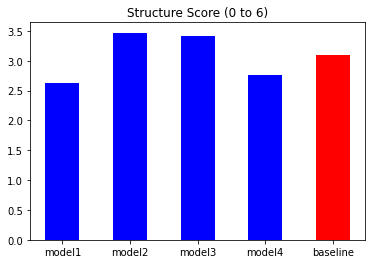

In [21]:
import matplotlib.pyplot as plt

plt.title("Structure Score (0 to 6)")

scores = [score1, score2, score3, score4, score_human]
colors=['blue', 'blue', 'blue', 'blue', 'red']
labels = ["model1", "model2", "model3", "model4", "baseline"]

plt.bar(labels, scores, width=0.5, color=colors)

# plt.xlabel(["model1", "model2", "model3", "model4", "baseline"], colors)

plt.show()